# **Load Package**

In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.0 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
     |████████████████████████████████| 261 kB 40.2 MB/s 
     |████████████████████████████████| 15.5 MB 50.2 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 1.7 MB 10.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 10.5 MB/s 
     |████████████████████████████████| 1.3 MB 42.8 MB/s 
     |████████████████████████████████| 167 kB 53.5 MB/s 
     |████████████████████████████████| 2.0 MB 18.7 MB/s 
     |████████████████████████████████| 113 kB 49.1 MB/s 
     |████████████████████████████████| 3.1 MB 37.4 MB/s 
     |████████████████████████████████| 102 kB 3.9 MB/s 
     |████████████████████████████████| 303 kB 22.7 MB/s 
     |██████████████████

In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import requests
from pycaret.clustering import *

# **Load Data**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BADS7105_CRM/99_Backup/SupermarketData.csv')
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
display(df.head())
print(df.info())

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 956574 non-null  int64         
 1   SHOP_DATE                 956574 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              956574 non-null  int64         
 3   SHOP_HOUR                 956574 non-null  int64         
 4   QUANTITY                  956574 non-null  int64         
 5   SPEND                     956574 non-null  float64       
 6   PROD_CODE                 956574 non-null  object        
 7   PROD_CODE_10              956574 non-null  object        
 8   PROD_CODE_20              956574 non-null  object        
 9   PROD_CODE_30              956574 non-null  object        
 10  PROD_CODE_40              956574 non-null  object        
 11  CUST_CODE                 802892 non-null  object        
 12  CU

In [18]:
#Create New Columns
new_df = df.join(pd.get_dummies(df['CUST_LIFESTAGE'] ,prefix='LIFESTAGE'))
new_df = new_df.join(pd.get_dummies(df['CUST_PRICE_SENSITIVITY'] ,prefix='PRICE_SENSITIVE'))
new_df = new_df.join(pd.get_dummies(df['BASKET_DOMINANT_MISSION'] ,prefix='BASKET_MISSION'))
new_df['SHOP_WEEKEND'] = np.where(new_df['SHOP_WEEKDAY'].isin([1,7]) , 1 ,0)
new_df['SHOP_WEEKDAY'] = np.where(new_df['SHOP_WEEKDAY'].isin([2,3,4,5,6]) , 1 ,0)
new_df.head(2)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,LIFESTAGE_OA,LIFESTAGE_OF,LIFESTAGE_OT,LIFESTAGE_PE,LIFESTAGE_YA,LIFESTAGE_YF,PRICE_SENSITIVE_LA,PRICE_SENSITIVE_MM,PRICE_SENSITIVE_UM,PRICE_SENSITIVE_XX,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Nonfood,BASKET_MISSION_XX,SHOP_WEEKEND
0,200732,2007-10-05,1,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,200733,2007-10-10,1,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


# **Prepare customer single view**

## **Calculate** **features**

In [19]:
##prepare busket single view
df_busket = new_df[new_df['CUST_CODE'].notnull()].groupby(by=['BASKET_ID','CUST_CODE']).agg(BASKET_MISSION_Fresh=('BASKET_MISSION_Fresh', 'max'),
                                                                                            BASKET_MISSION_Grocery=('BASKET_MISSION_Grocery', 'max'),
                                                                                            BASKET_MISSION_Mixed=('BASKET_MISSION_Mixed', 'max'),
                                                                                            BASKET_MISSION_Nonfood=('BASKET_MISSION_Nonfood', 'max'),
                                                                                            SHOP_WEEKEND=('SHOP_WEEKEND', 'max'),
                                                                                            SHOP_WEEKDAY=('SHOP_WEEKDAY', 'max'),
                                                                                            ).reset_index()
df_busket.head()

,BASKET_ID,CUST_CODE,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Nonfood,SHOP_WEEKEND,SHOP_WEEKDAY
0,994100100152797,CUST0000000369,1,0,0,0,1,0
1,994100100154066,CUST0000002499,1,0,0,0,0,1
2,994100100154981,CUST0000004088,1,0,0,0,0,1
3,994100100155590,CUST0000005053,1,0,0,0,0,1
4,994100100157681,CUST0000008415,0,0,1,0,0,1


In [20]:
df_cst_busket = df_busket.groupby(by=['CUST_CODE']).agg(BASKET_MISSION_Fresh=('BASKET_MISSION_Fresh', 'sum'),
                                                    BASKET_MISSION_Grocery=('BASKET_MISSION_Grocery', 'sum'),
                                                    BASKET_MISSION_Mixed=('BASKET_MISSION_Mixed', 'sum'),
                                                    BASKET_MISSION_Nonfood=('BASKET_MISSION_Nonfood', 'sum'),
                                                    SHOP_WEEKEND=('SHOP_WEEKEND', 'sum'),
                                                    SHOP_WEEKDAY=('SHOP_WEEKDAY', 'sum'))
df_cst_busket.head()

,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Nonfood,SHOP_WEEKEND,SHOP_WEEKDAY
CUST_CODE,,,,,,
CUST0000000181,1.0,0.0,0.0,0,1,0
CUST0000000369,157.0,32.0,29.0,2,54,166
CUST0000000689,5.0,3.0,7.0,1,5,11
CUST0000000998,0.0,2.0,0.0,1,1,2
CUST0000001163,3.0,0.0,1.0,0,3,1


In [21]:
##prepare customer single view
df_cst = new_df[new_df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalUnit=('QUANTITY' , 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  LIFESTAGE_OA=('LIFESTAGE_OA', 'max'),
                                                                                  LIFESTAGE_OF=('LIFESTAGE_OF', 'max'),
                                                                                  LIFESTAGE_OT=('LIFESTAGE_OT', 'max'),
                                                                                  LIFESTAGE_PE=('LIFESTAGE_PE', 'max'),
                                                                                  LIFESTAGE_YA=('LIFESTAGE_YA', 'max'),
                                                                                  LIFESTAGE_YF=('LIFESTAGE_YF', 'max'),
                                                                                  PRICE_SENSITIVE_LA=('PRICE_SENSITIVE_LA', 'max'),
                                                                                  PRICE_SENSITIVE_MM=('PRICE_SENSITIVE_MM', 'max'),
                                                                                  PRICE_SENSITIVE_UM=('PRICE_SENSITIVE_UM', 'max'),
                                                                                  ).join(df_cst_busket)
df_cst.head()

,TotalSpend,TotalUnit,TotalVisits,TotalSKUs,FirstDate,LastDate,LIFESTAGE_OA,LIFESTAGE_OF,LIFESTAGE_OT,LIFESTAGE_PE,LIFESTAGE_YA,LIFESTAGE_YF,PRICE_SENSITIVE_LA,PRICE_SENSITIVE_MM,PRICE_SENSITIVE_UM,BASKET_MISSION_Fresh,BASKET_MISSION_Grocery,BASKET_MISSION_Mixed,BASKET_MISSION_Nonfood,SHOP_WEEKEND,SHOP_WEEKDAY
CUST_CODE,,,,,,,,,,,,,,,,,,,,,
CUST0000000181,2.44,1,1,1,2007-01-06,2007-01-06,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,0,1,0
CUST0000000369,959.33,923,220,189,2006-04-16,2008-07-05,1,0,0,0,0,0,0,1,0,157.0,32.0,29.0,2,54,166
CUST0000000689,328.57,334,16,116,2007-07-22,2008-06-23,0,0,0,0,0,0,1,0,0,5.0,3.0,7.0,1,5,11
CUST0000000998,5.95,6,3,4,2006-05-04,2006-07-07,0,0,0,0,0,0,0,0,0,0.0,2.0,0.0,1,1,2
CUST0000001163,39.74,34,4,24,2006-10-22,2008-06-22,0,0,0,0,0,0,0,1,0,3.0,0.0,1.0,0,3,1


In [22]:
##calculate ticket size
df_cst['TicketSize'] = df_cst['TotalSpend']/df_cst['TotalVisits']

##find max date in the dataset
max_date = df_cst['LastDate'].max()

##%Basket Mission 
df_cst['PCT_MISSION_FRESH'] = df_cst['BASKET_MISSION_Fresh']/df_cst['TotalVisits']
df_cst['PCT_MISSION_GROCERY'] = df_cst['BASKET_MISSION_Grocery']/df_cst['TotalVisits']
df_cst['PCT_MISSION_MIXED'] = df_cst['BASKET_MISSION_Mixed']/df_cst['TotalVisits']
df_cst['PCT_MISSION_NONFOOD'] = df_cst['BASKET_MISSION_Nonfood']/df_cst['TotalVisits']


## %VISIT WEEKEND WEEKDAY
df_cst['PCT_WEEKEND'] = df_cst['SHOP_WEEKEND']/df_cst['TotalVisits']
df_cst['PCT_WEEKDAY'] = df_cst['SHOP_WEEKDAY']/df_cst['TotalVisits']

##calculate total days of the relationship
df_cst['total_days'] = (df_cst['LastDate'] - df_cst['FirstDate']).dt.days + 1
##calculate recency days
df_cst['recency'] = (max_date - df_cst['LastDate']).dt.days

## Drop Columns non use
df_cst = df_cst.drop(columns=['BASKET_MISSION_Fresh','BASKET_MISSION_Grocery','BASKET_MISSION_Mixed','BASKET_MISSION_Nonfood','SHOP_WEEKEND','SHOP_WEEKDAY'])

In [23]:
df_cst.head(3).T

CUST_CODE,CUST0000000181,CUST0000000369,CUST0000000689
TotalSpend,2.44,959.33,328.57
TotalUnit,1,923,334
TotalVisits,1,220,16
TotalSKUs,1,189,116
FirstDate,2007-01-06 00:00:00,2006-04-16 00:00:00,2007-07-22 00:00:00
LastDate,2007-01-06 00:00:00,2008-07-05 00:00:00,2008-06-23 00:00:00
LIFESTAGE_OA,0,1,0
LIFESTAGE_OF,0,0,0
LIFESTAGE_OT,0,0,0
LIFESTAGE_PE,0,0,0


# **Set up Cluster tools**

In [24]:
exp_clu = setup(data=df_cst, ignore_features=['FirstDate','LastDate'], normalize=True)

,Description,Value
0,session_id,5406
1,Original Data,"(6100, 24)"
2,Missing Values,False
3,Numeric Features,22
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 22)"
9,CPU Jobs,-1


In [25]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [26]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f441997f950>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f44199...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f441997fcb0>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f4419bfa9e0>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f4419bfa7a0>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f4419bfaa70>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [27]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0333,50.7861,5.7267,0,0,0


In [28]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.869500,102.221600,0.090500,0,0,0
birch,0.221700,1100.666800,1.428100,0,0,0
hclust,0.203300,1075.769300,1.682800,0,0,0
kmeans,0.194900,1338.972700,1.620800,0,0,0
ap,0.144300,190.316700,1.623900,0,0,0
kmodes,-0.033300,50.786100,5.726700,0,0,0
dbscan,-0.259800,13.485000,1.006800,0,0,0


# SC - Spectral Clustering Clustering

In [29]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8695,102.2216,0.0905,0,0,0


In [30]:
plot_model(sc)

# KMeans Clustering

In [31]:
kmeans = create_model('kmeans')
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1949,1338.9727,1.6208,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5406, tol=0.0001, verbose=0)


In [32]:
plot_model(kmeans)

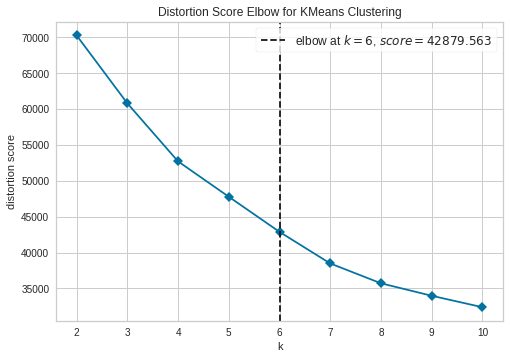

In [34]:
plot_model(kmeans, plot = 'elbow')

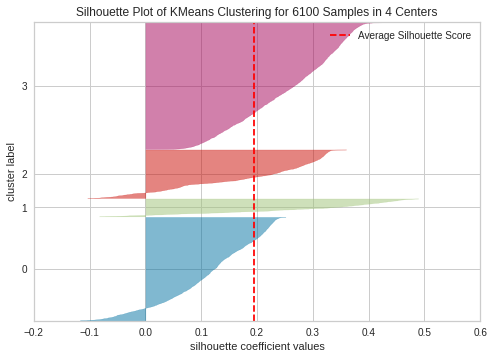

In [35]:
plot_model(kmeans, plot = 'silhouette')
## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [36]:
resule_kmeans = predict_model(kmeans ,data=df_cst)
resule_kmeans.head(2)

,TotalSpend,TotalUnit,TotalVisits,TotalSKUs,FirstDate,LastDate,LIFESTAGE_OA,LIFESTAGE_OF,LIFESTAGE_OT,LIFESTAGE_PE,LIFESTAGE_YA,LIFESTAGE_YF,PRICE_SENSITIVE_LA,PRICE_SENSITIVE_MM,PRICE_SENSITIVE_UM,TicketSize,PCT_MISSION_FRESH,PCT_MISSION_GROCERY,PCT_MISSION_MIXED,PCT_MISSION_NONFOOD,PCT_WEEKEND,PCT_WEEKDAY,total_days,recency,Cluster
CUST_CODE,,,,,,,,,,,,,,,,,,,,,,,,,
CUST0000000181,2.44,1,1,1,2007-01-06,2007-01-06,0,0,0,0,0,0,0,1,0,2.440000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1,547,Cluster 2
CUST0000000369,959.33,923,220,189,2006-04-16,2008-07-05,1,0,0,0,0,0,0,1,0,4.360591,0.713636,0.145455,0.131818,0.009091,0.245455,0.754545,812,1,Cluster 1


In [38]:
resule_kmeans.groupby(['Cluster']).mean().T.style.highlight_max(color = 'lightgreen', axis = 1)

Cluster,Cluster 0,Cluster 1,Cluster 2,Cluster 3
TotalSpend,14.278416,2515.479539,12.593647,203.327758
TotalUnit,10.858083,2065.991870,9.792585,159.046449
TotalVisits,1.727444,171.512195,1.661323,20.558925
TotalSKUs,6.721805,366.230352,6.213427,56.388868
LIFESTAGE_OA,0.101504,0.173442,0.116232,0.119770
LIFESTAGE_OF,0.057331,0.075881,0.056112,0.056046
LIFESTAGE_OT,0.340695,0.230352,0.335671,0.320921
LIFESTAGE_PE,0.048402,0.086721,0.041082,0.059501
LIFESTAGE_YA,0.154605,0.097561,0.135271,0.151248
LIFESTAGE_YF,0.161184,0.211382,0.176353,0.164683


'Cluster 1' ---> Loyalty : มาอย่างน้อยอาทิตย์ละ 1 ครั้ง ซื้อเยอะและหลากหลาย --> Action : จัดทำ Loyalty Program สะสมแต้ม
<br>'Cluster 3' ---> Potential : มองเราเป็นตัวเลือก นานๆมาที่ ซื้อของที่หลากหลาย --> Action : ดึงมาเข้าร่วม Loyalty Program/สะสมแต้ม /ส่ง Promotion ให้
<br>'Cluster 0' ---> Bussiness Traveler : ซื้อเล็กๆน้อยๆ ในวันธรรมดา --> Action : จัดโปรโมชั่นสินค้าเกี่ยวกับ GROCERY เพื่อดึงกลุ่มนี้มา
<br>'Cluster 2' ---> Tourist : ซื้อเล็กๆน้อยๆ ในวันหยุด --> Action : จัดโปรโมชั่นสินค้าเกี่ยวกับ GROCERY เพื่อดึงกลุ่มนี้มา

In [62]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
clf_feature = resule_kmeans.drop(columns=['Cluster','FirstDate','LastDate'])
clf_y = resule_kmeans['Cluster'].str[-1].astype(int)
clf.fit( clf_feature, clf_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

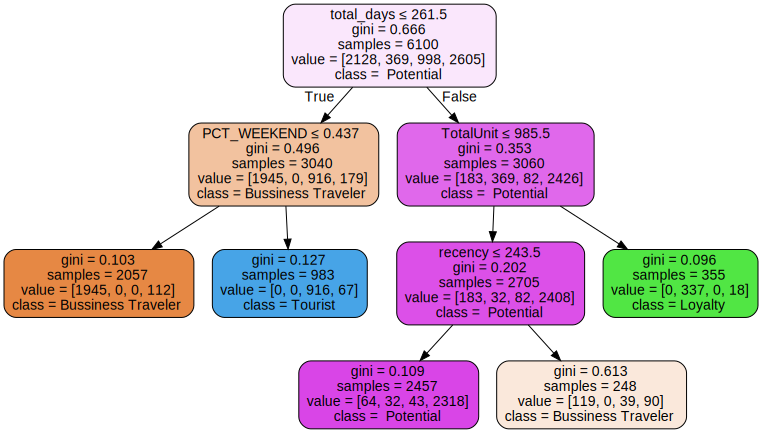

In [68]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=clf_feature.columns.values,  
                     class_names=["Bussiness Traveler","Loyalty","Tourist"," Potential"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph